In [41]:
import numpy as np
import os
import model_funcs
import eval_funcs
import pandas as pd
import torch 
import json
import matplotlib.pyplot as plt
from matplotlib import cm

device = torch.device('cpu')

MODELS_DIR = '/scratch/ci411/sonos_rirs/models/'
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2
import eval_funcs

In [18]:
def re_evaluate_experiment(experiment_name, log=False, same_features=True):
    split = 'test'
    model_list = os.listdir(os.path.join(MODELS_DIR, experiment_name))
    model_list.sort()
    
    _, model_spec, _ = eval_funcs.get_model_hist_spec_state(model_list[0], experiment_name)
    feature_df = pd.read_csv(model_spec['data_path'])
    test_dataloader = model_funcs.create_dataloader(feature_df[feature_df['split']==split], log=log)
    del feature_df

    features, labels = next(iter(test_dataloader))
    input_height = features.size()[2]
    input_width = features.size()[3]

    model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
    
    for model_name in model_list:
        print("Loading {}".format(model_name))
        _, model_spec, model_state = eval_funcs.get_model_hist_spec_state(model_name, experiment_name)
        
        if not same_features:
            print("Loading features from {}".format(model_spec['data_path']))
            feature_df = pd.read_csv(model_spec['data_path'])
            test_dataloader = model_funcs.create_dataloader(feature_df[feature_df['split']==split], log=log)
            del feature_df
            features, labels = next(iter(test_dataloader))
            input_height = features.size()[2]
            input_width = features.size()[3]
            model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
        
        if os.path.exists(model_state):
            model.load_state_dict(torch.load(model_state, map_location=device))
        else:
            continue
            
        test_metrics = eval_funcs.compute_eval_metrics(test_dataloader, model, log=log)
        try:
            metric_path = os.path.join(MODELS_DIR, experiment_name, model_name, 'test_metrics.json')
        except RuntimeError as e:
            print("Error loading model, skipping")
            continue
            
        print(test_metrics)
        print('Saving metrics to {}'.format(metric_path))
        with open(metric_path, 'w') as f:
            json.dump(test_metrics, f)
    
    return None

In [3]:
experiment_name = 'early_runs'
model_name = '080522_prop0nl'
log = False


split = 'test'

model_hist, model_spec, model_state = eval_funcs.get_model_hist_spec_state(model_name, experiment_name)

feature_df = pd.read_csv(model_spec['data_path'])

test_dataloader = model_funcs.create_dataloader(feature_df[feature_df['split']==split], log=log)

del feature_df

features, labels = next(iter(test_dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(model_state, map_location=device))

test_metrics = eval_funcs.compute_eval_metrics(test_dataloader, model, log=log)
print(test_metrics)

metric_path = os.path.join(MODELS_DIR, experiment_name, model_name, 'test_metrics.json')
print('Saving metrics to {}'.format(metric_path))
with open(metric_path, 'w') as f:
    json.dump(test_metrics, f)

{'mse': 3544822.4450332006, 'bias': 511.72967514059013, 'pearson_cor': 0.39935253669784765, 'mean_mult': 9.135930628576055, 'var_ratio': 4.55145263818305}
Saving metrics to /scratch/ci411/sonos_rirs/models/early_runs/080522_prop0nl/test_metrics.json


NameError: name 'json' is not defined

{'mse': 3285301.3148286124, 'bias': 619.5822710927188, 'pearson_cor': 0.6027637061289756, 'mean_mult': 8.046340320754574, 'var_ratio': 4.519213381789078}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_learning_rate/bl_lr3/test_metrics.json
{'mse': 2539439.8523636237, 'bias': 1120.5134121896656, 'pearson_cor': 0.14233576525864672, 'mean_mult': 11.443562205449663, 'var_ratio': 2.611670633008396}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_learning_rate/bl_lr9/test_metrics.json
{'mse': 3478051.670614785, 'bias': 1812.4486368055275, 'pearson_cor': 0.02591580009038562, 'mean_mult': 18.631043628648207, 'var_ratio': 0.2785116354690007}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_learning_rate/bl_lr1/test_metrics.json
{'mse': 2259545.4709601137, 'bias': 875.7095917239523, 'pearson_cor': 0.345144623411135, 'mean_mult': 9.91688228844176, 'var_ratio': 3.0547800011073996}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_learning_rate/bl_lr7/test_metrics.json
{'mse':

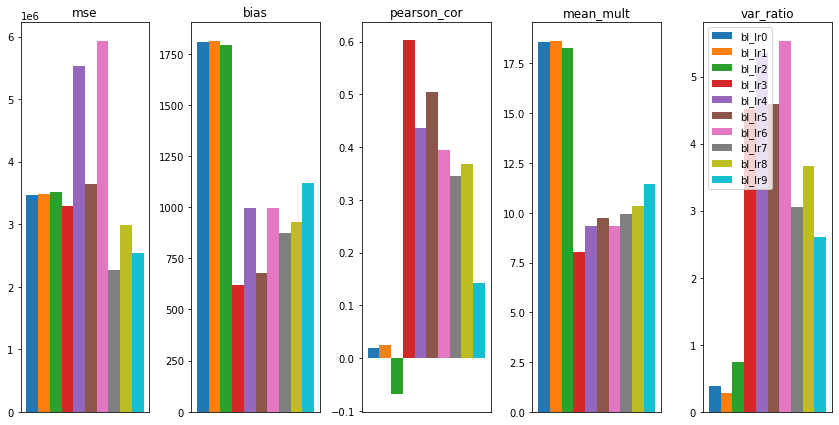

In [7]:
experiment_name = 'bl_learning_rate'
re_evaluate_experiment(experiment_name)

{'mse': 4144905.1368307048, 'bias': 828.094717333786, 'pearson_cor': 0.3981108036229142, 'mean_mult': 8.129864994229383, 'var_ratio': 4.664879697566231}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_l2_reg/bl_l23/test_metrics.json
{'mse': 5163979.935062269, 'bias': 947.8881710948616, 'pearson_cor': 0.359875134621404, 'mean_mult': 10.60734467537409, 'var_ratio': 5.119366965491141}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_l2_reg/bl_l29/test_metrics.json
{'mse': 4686465.080992042, 'bias': 903.3318249379653, 'pearson_cor': 0.4528850461034028, 'mean_mult': 8.721346840545499, 'var_ratio': 4.98343494905111}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_l2_reg/bl_l21/test_metrics.json
{'mse': 8087355.542094415, 'bias': 1361.909668596302, 'pearson_cor': 0.37007740428531527, 'mean_mult': 10.100363032646243, 'var_ratio': 6.154319768217719}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_l2_reg/bl_l27/test_metrics.json
{'mse': 4473925.576132126, 'bias': 755.09307

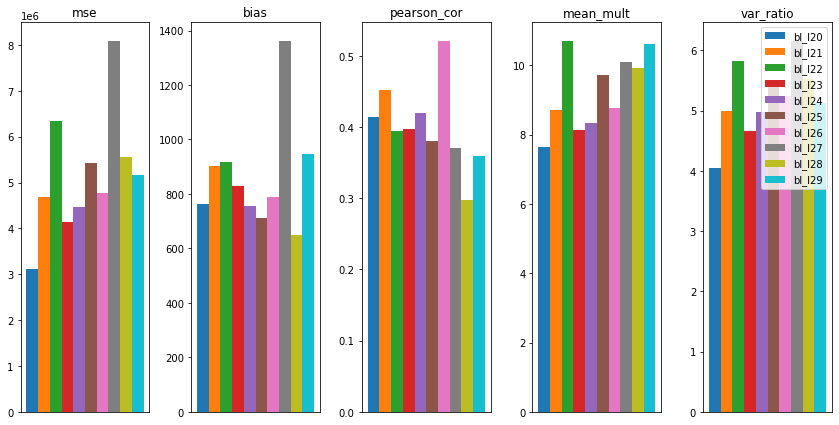

In [8]:
experiment_name = 'bl_l2_reg'
re_evaluate_experiment(experiment_name)

{'mse': 3529880.5490951114, 'bias': 659.1653089391986, 'pearson_cor': 0.5364441655303104, 'mean_mult': 7.8613462864117665, 'var_ratio': 4.577950851062318}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_sched_thres/bl_st1/test_metrics.json
{'mse': 4386696.190322584, 'bias': 967.6685692406738, 'pearson_cor': 0.3833807418340932, 'mean_mult': 9.17437042781805, 'var_ratio': 4.64572488763304}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_sched_thres/bl_st2/test_metrics.json
{'mse': 6516983.722733351, 'bias': 1102.957429907386, 'pearson_cor': 0.39486919894880407, 'mean_mult': 9.246723419210772, 'var_ratio': 5.71876612591976}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_sched_thres/bl_st4/test_metrics.json
{'mse': 4534086.6686868565, 'bias': 1060.4139599863936, 'pearson_cor': 0.35587041246096746, 'mean_mult': 9.926453655936589, 'var_ratio': 4.589316171485039}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_sched_thres/bl_st3/test_metrics.json
{'mse': 5824574.60492

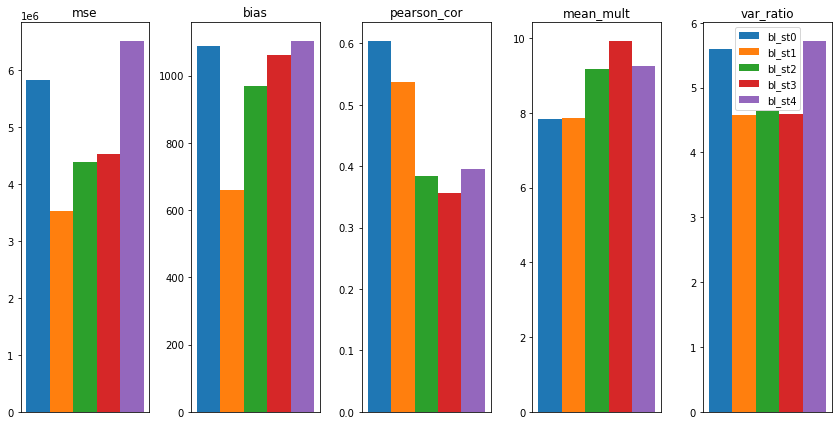

In [6]:
experiment_name = 'bl_sched_thres'
re_evaluate_experiment(experiment_name)

{'mse': 3205443.151771705, 'bias': 1099.0052828841615, 'pearson_cor': 0.27581726158698405, 'mean_mult': 11.448161723075788, 'var_ratio': 3.4507966956542853}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_batch_size/bl_bs3/test_metrics.json
No history file at /scratch/ci411/sonos_rirs/models/bl_batch_size/bl_bs6/hist.json
{'mse': 6133735.519758134, 'bias': 1153.6186191545187, 'pearson_cor': 0.5002658988001326, 'mean_mult': 12.359188994354026, 'var_ratio': 5.569333054128343}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_batch_size/bl_bs0/test_metrics.json
{'mse': 5642479.887481506, 'bias': 1445.0460938602075, 'pearson_cor': 0.7410480930090265, 'mean_mult': 10.545752349656704, 'var_ratio': 5.1137307220841}
Saving metrics to /scratch/ci411/sonos_rirs/models/bl_batch_size/bl_bs4/test_metrics.json
{'mse': 3266271.958590452, 'bias': 1037.3288741761164, 'pearson_cor': 0.37916743955742566, 'mean_mult': 10.764002145314613, 'var_ratio': 3.7284545759203374}
Saving metrics to /scratc

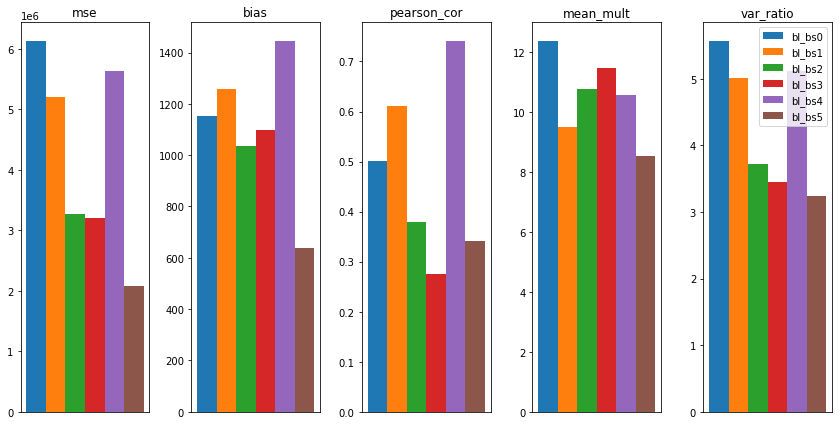

In [8]:
experiment_name = 'bl_batch_size'
re_evaluate_experiment(experiment_name)

In [19]:
experiment_name = 'early_runs'
re_evaluate_experiment(experiment_name)
eval_funcs.plot_experiment_metrics(experiment_name, same_features=False)

Loading 080322_baseline
{'mse': 285393.9464385353, 'bias': -322.14026974970665, 'pearson_cor': 4.1956031738177886e-15, 'mean_mult': 42.73467407146916, 'var_ratio': 6.356509597279954e-17}
Saving metrics to /scratch/ci411/sonos_rirs/models/early_runs/080322_baseline/test_metrics.json
Loading 080322_baseline_ALR
{'mse': 285386.55178067996, 'bias': -322.1287921570525, 'pearson_cor': 4.290723899621563e-15, 'mean_mult': 42.55244975321312, 'var_ratio': 9.482661858237308e-17}
Saving metrics to /scratch/ci411/sonos_rirs/models/early_runs/080322_baseline_ALR/test_metrics.json
Loading 080322_prop1
{'mse': 285393.92747480015, 'bias': -322.1402403157356, 'pearson_cor': -4.068975653208787e-15, 'mean_mult': 42.73420476616214, 'var_ratio': 1.7714862812091677e-17}
Saving metrics to /scratch/ci411/sonos_rirs/models/early_runs/080322_prop1/test_metrics.json
Loading 080322_prop2
{'mse': 285393.75200819137, 'bias': -322.13996797055535, 'pearson_cor': 4.526261810822302e-15, 'mean_mult': 42.729862890511626, 

RuntimeError: Error(s) in loading state_dict for Baseline_Model:
	size mismatch for net.20.weight: copying a param with shape torch.Size([1, 1495]) from checkpoint, the shape in current model is torch.Size([1, 1150]).

In [82]:
def plot_experiment_curves(experiment_name, model_names=None, offset=100):
        
    experiment_dir = os.path.join(MODELS_DIR, experiment_name)
    
    if model_names is None:
        model_names = os.listdir(experiment_dir)
        model_names.sort()
            
    n = len(model_names)
    width = 0.5/n
    cmap = cm.ScalarMappable(cmap='coolwarm')
    colors = cmap.to_rgba(np.arange(n))
    
    fig, axs = plt.subplots(7,1, figsize=(12,16))
    fig.tight_layout()
    axs_lengths = np.ones(7)

    for i, model in enumerate(model_names):
        hist_json = os.path.join(experiment_dir, model, 'hist.json')
        if os.path.exists(hist_json):
            with open(hist_json) as f:
                hist = json.load(f)
        else:
            print("No metric file at {}".format(hist_json))
            continue
        
        for j, (key, vals) in enumerate(hist.items()):
            axs[j].plot(vals, color=colors[i], label=model)
            axs[j].set_title(key)
            seq_len = len(vals)
            if seq_len>axs_lengths[j]:
                axs_lengths[j] = seq_len
                axs[j].set_xlim([offset, axs_lengths[j]])
            
    plt.legend()             
    return fig

Using device: cpu


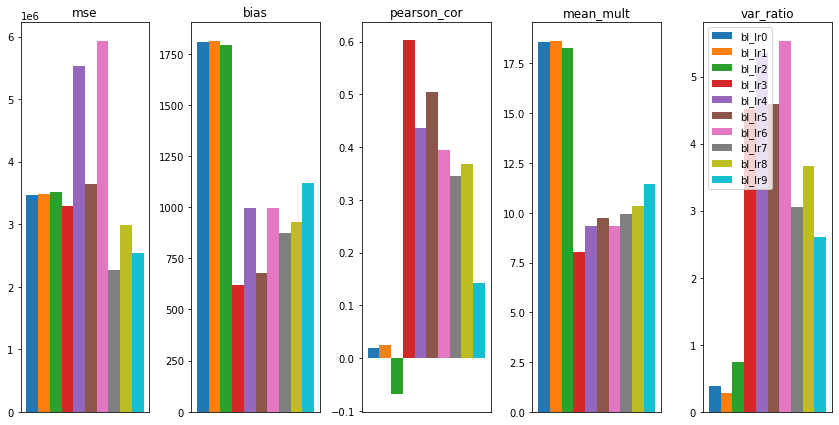

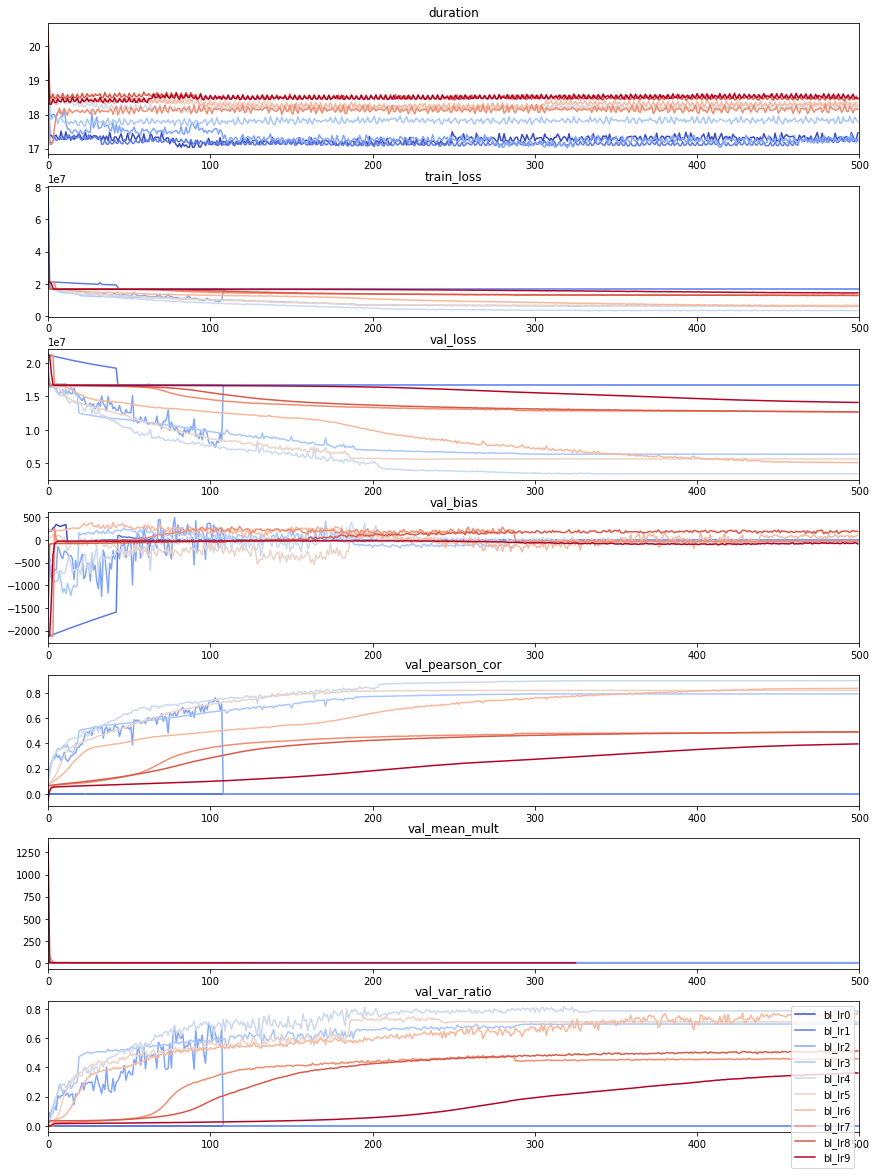

In [70]:
experiment_name = 'bl_learning_rate'
eval_funcs.plot_experiment_metrics(experiment_name)
fig_curves = plot_experiment_curves(experiment_name, offset=0)

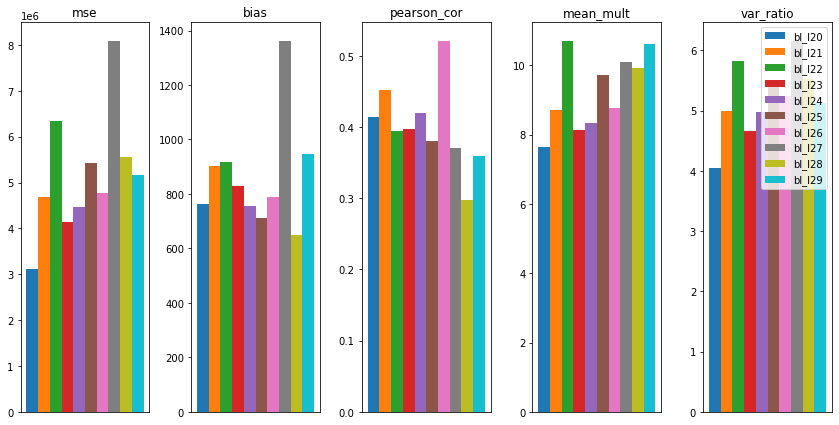

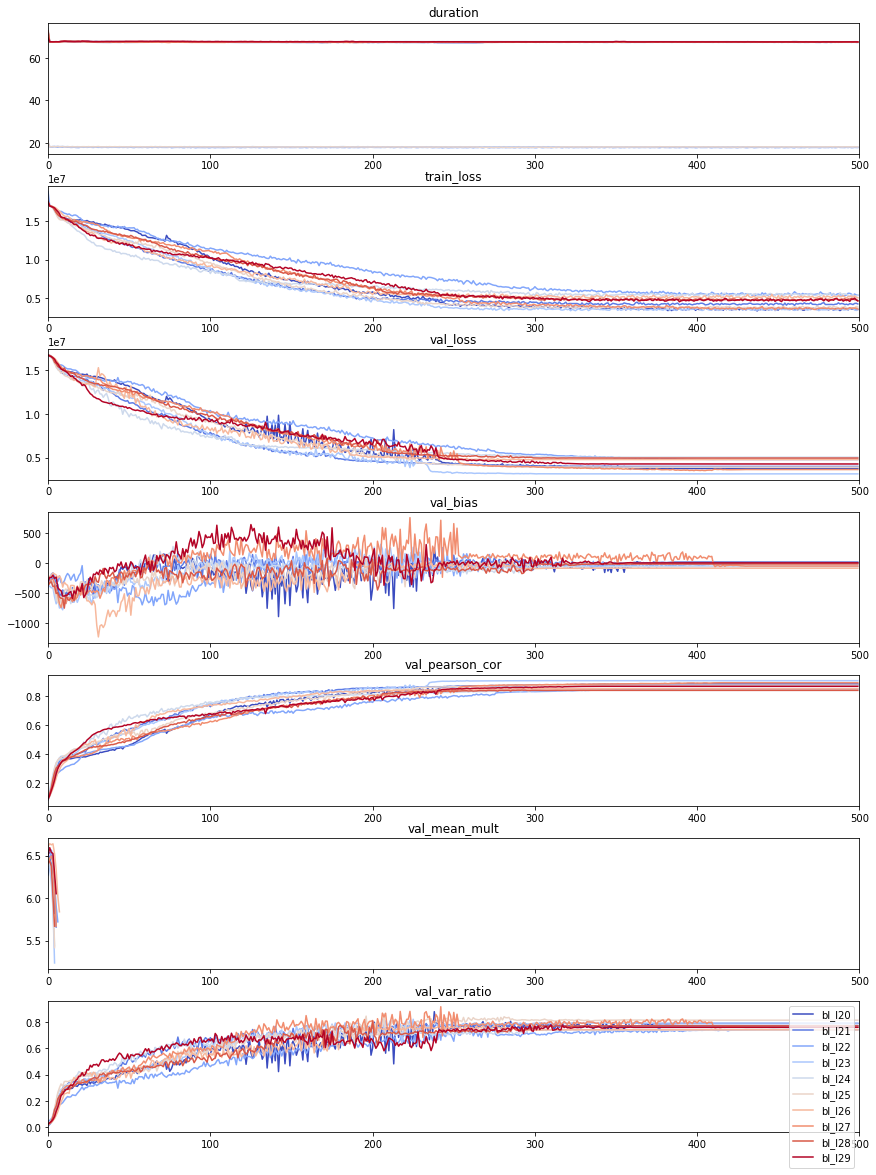

In [71]:
experiment_name = 'bl_l2_reg'
eval_funcs.plot_experiment_metrics(experiment_name)
fig_curves = plot_experiment_curves(experiment_name, offset=0)

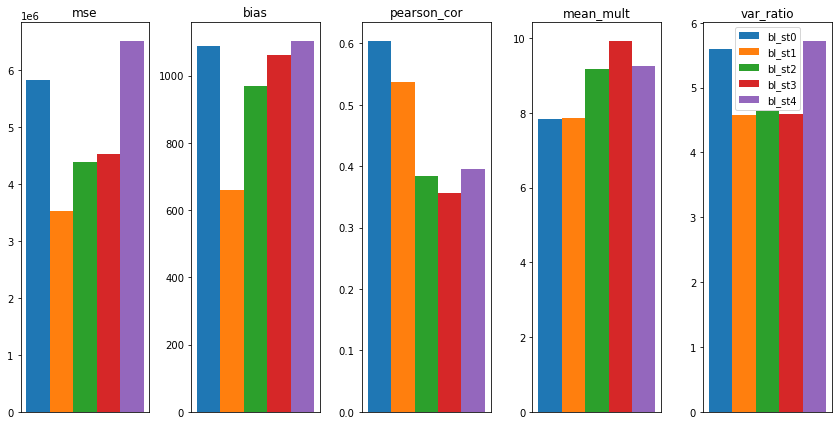

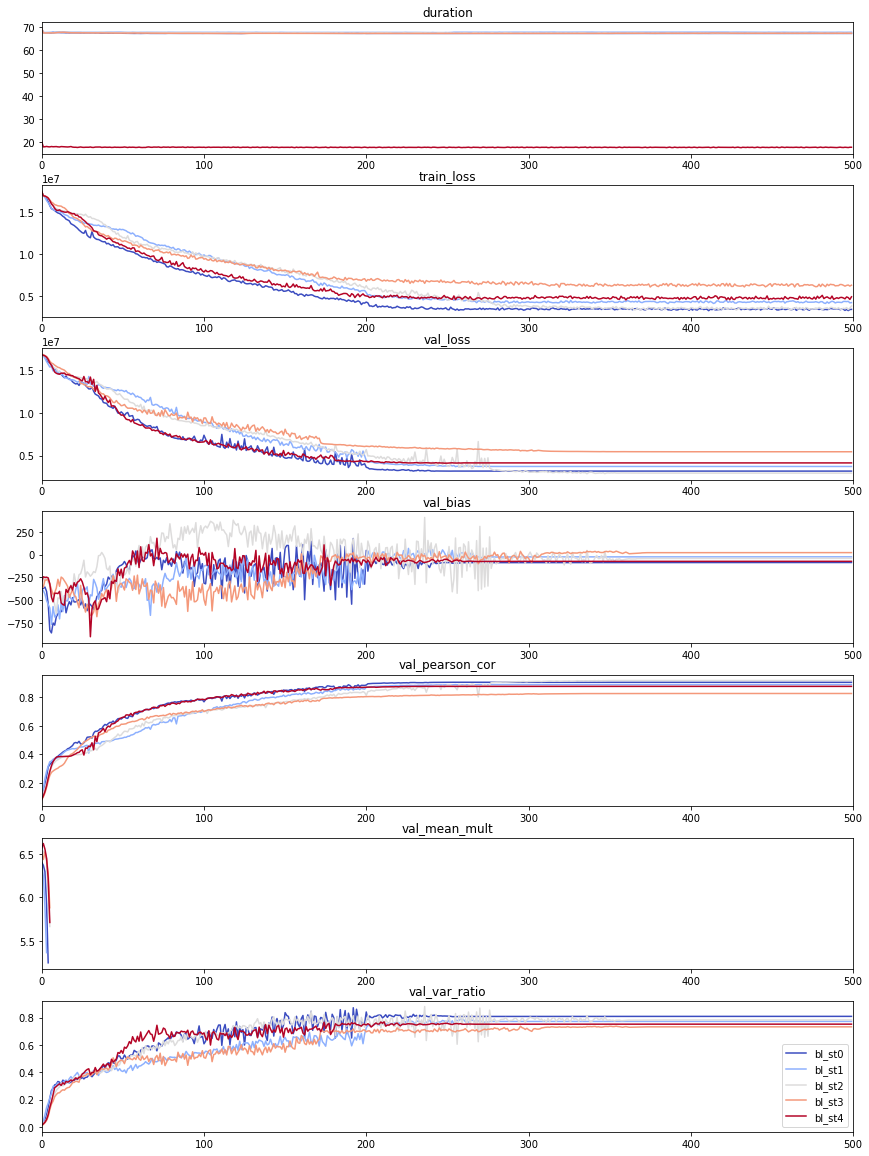

In [72]:
experiment_name = 'bl_sched_thres'
eval_funcs.plot_experiment_metrics(experiment_name)
fig_curves = plot_experiment_curves(experiment_name, offset=0)

No metric file at /scratch/ci411/sonos_rirs/models/bl_batch_size/bl_bs6/test_metrics.json
No metric file at /scratch/ci411/sonos_rirs/models/bl_batch_size/bl_bs6/hist.json


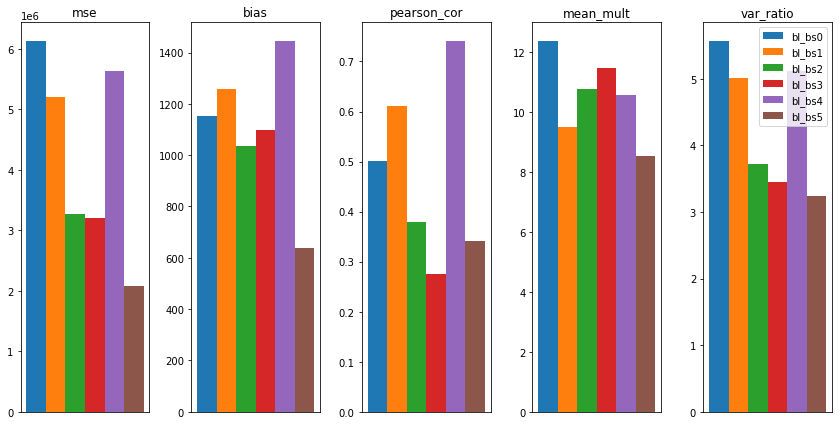

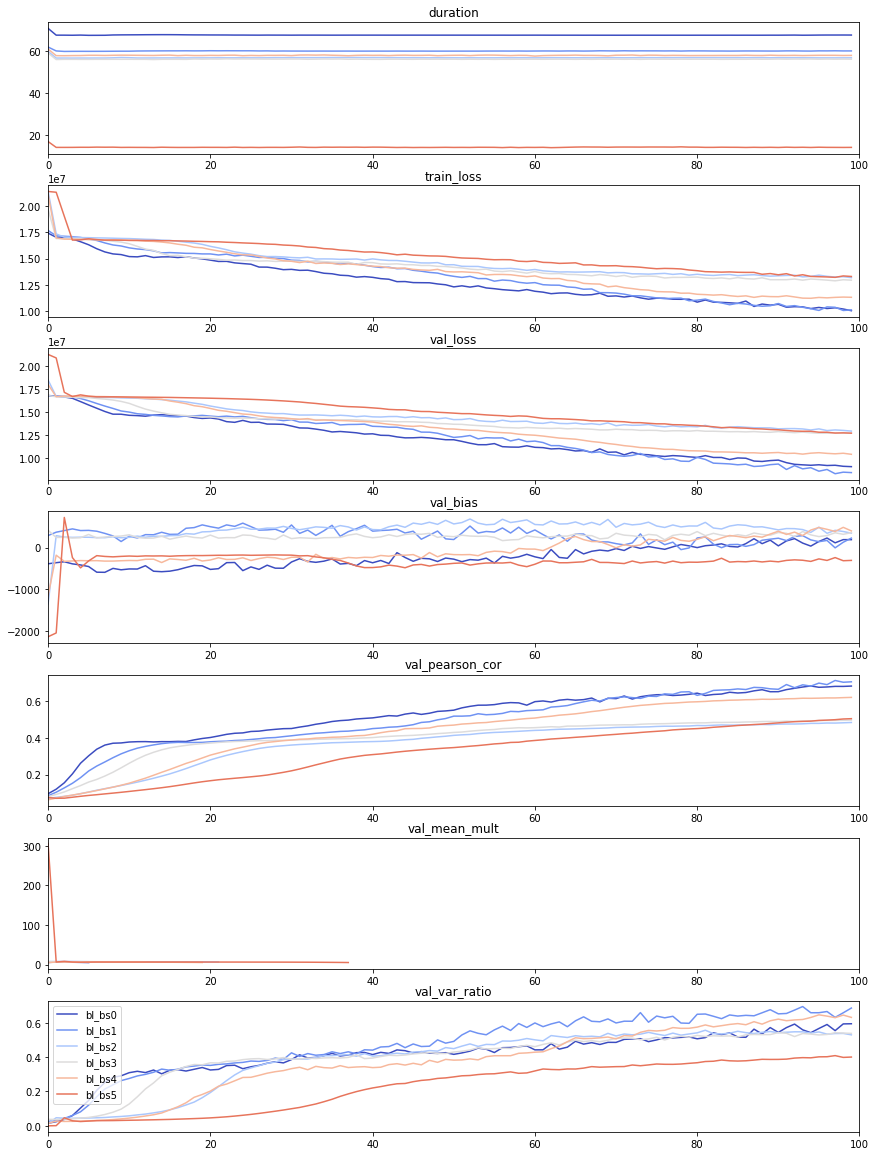

In [75]:
experiment_name = 'bl_batch_size'
eval_funcs.plot_experiment_metrics(experiment_name)
fig_curves = plot_experiment_curves(experiment_name, offset=0)

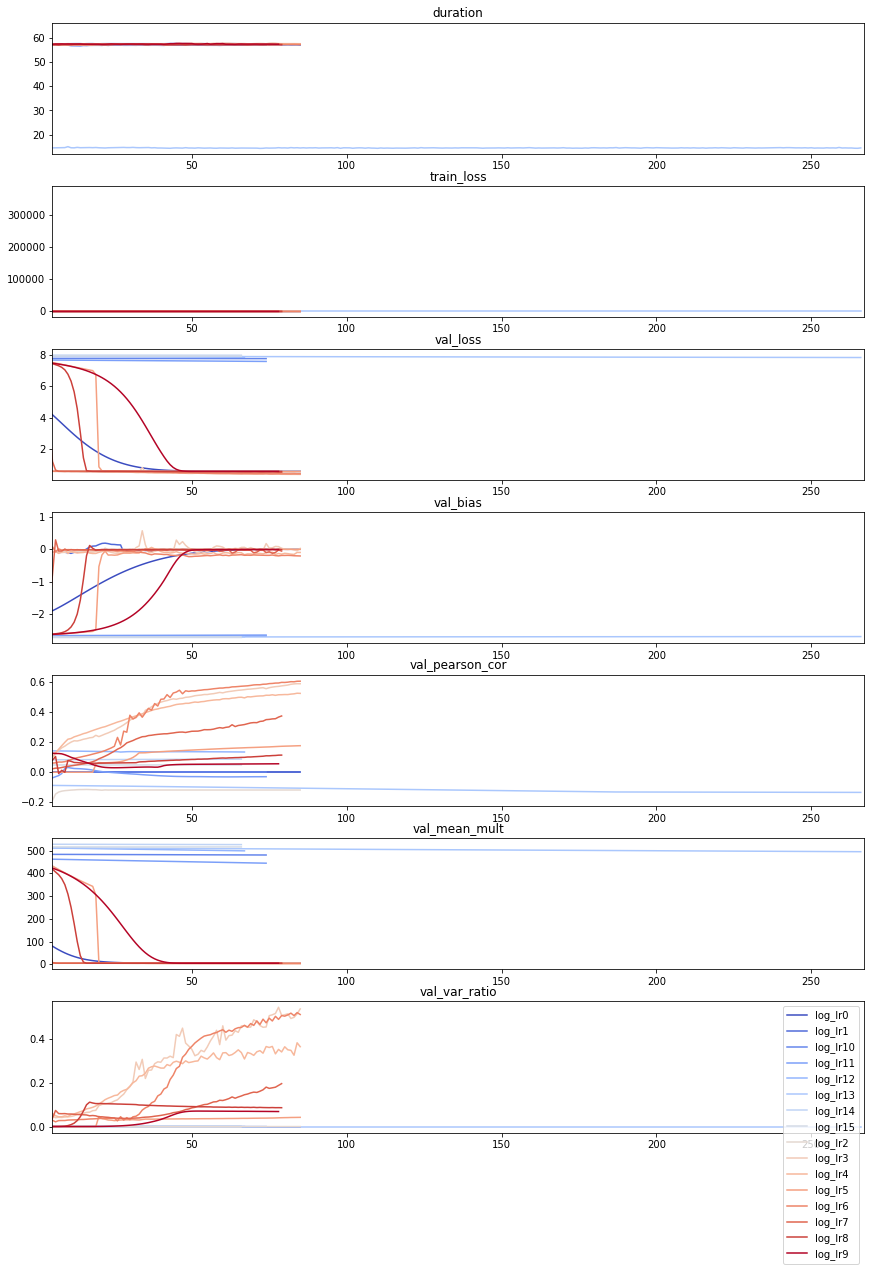

In [85]:
experiment_name = 'log_learning_rate'
subset = ["log_lr{}".format(i) for i in [4,5,6,7,8,9]]
fig_curves = plot_experiment_curves(experiment_name, model_names=None, offset=5)